# Gradient Descent
Author: Chul Min Yeum  
Email: cmyeum@uwaterloo.ca  

Last updated: 2023-11-13

## Line Fitting using Gradient Descent 


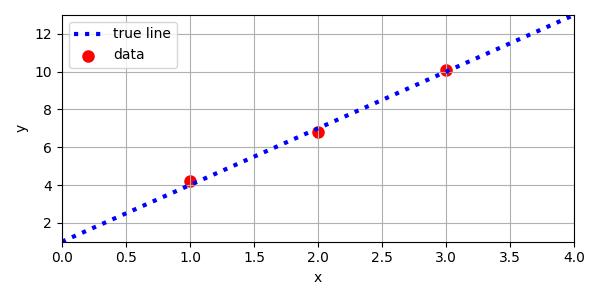

<Figure size 600x600 with 0 Axes>

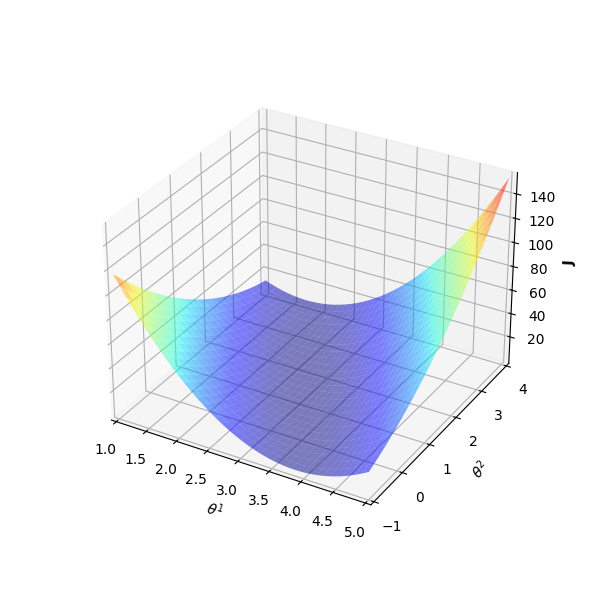

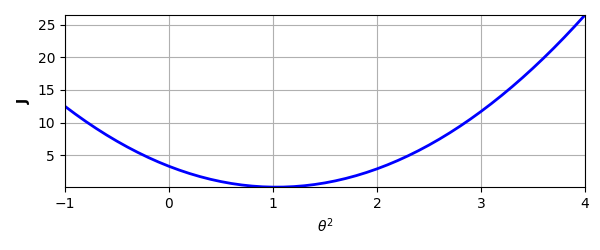

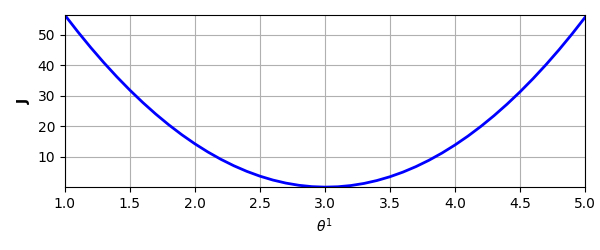

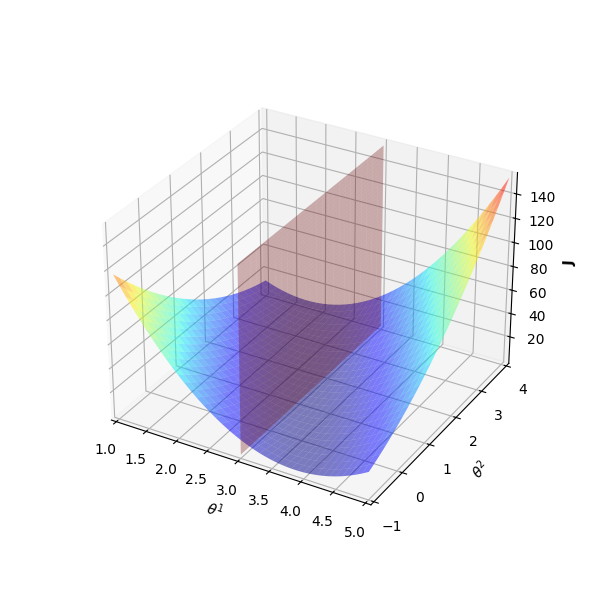

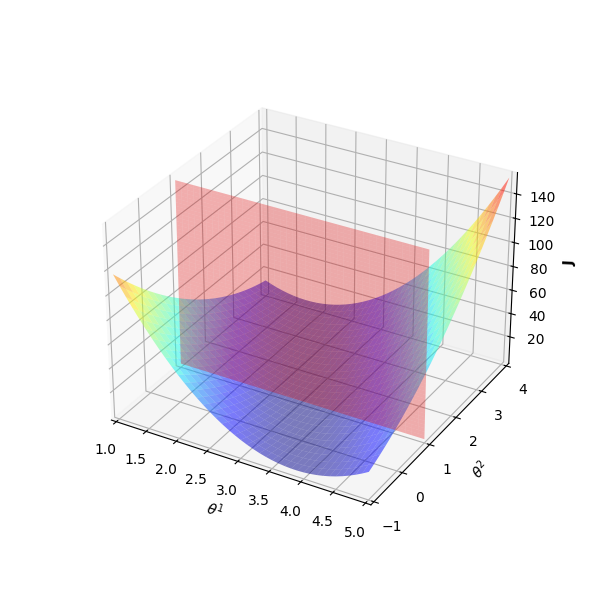

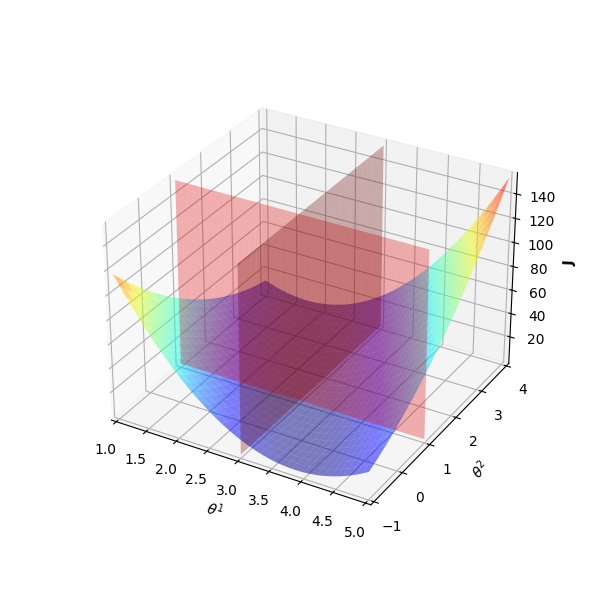

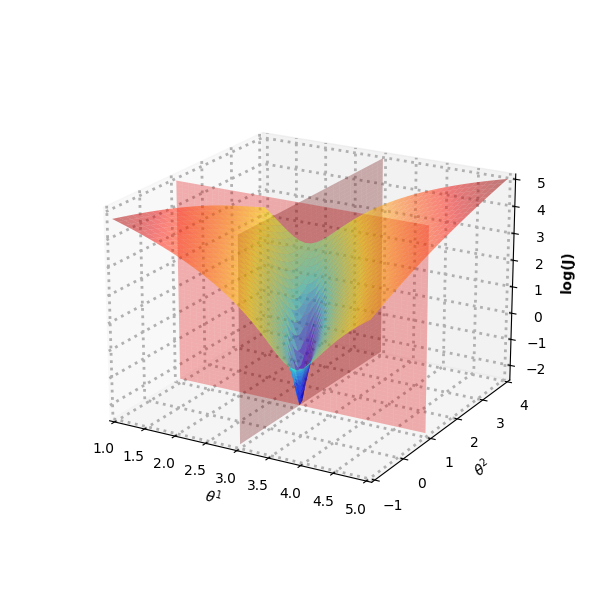

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}

# Cost function
def comp_j(in_data, out_data, th1, th2):
    J = np.zeros_like(th1)
    for i, (inp, out) in enumerate(zip(in_data, out_data)):
        J += (out - inp * th1 - th2) ** 2
    return J

# Input data
in_data = np.array([1, 2, 3])
out_data = np.array([4.2, 6.8, 10.1])

# Plot for the input data
plt.figure(1, figsize=(6, 3))
x = np.arange(0, 4.01, 0.01)
y = 3 * x + 1
plt.plot(x, y, ':b', linewidth=3, label='true line')
plt.scatter(in_data, out_data, color='r', linewidth=3, label='data')
plt.legend(loc=2)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([0, 4])
plt.ylim([1, 13])
plt.gca().set_prop_cycle(None)
plt.tight_layout()
plt.show()

plt.figure(2, figsize=(6, 6))
# Define the range for theta1 and theta2.
th1_range = np.arange(1, 5.1, 0.1)
th2_range = np.arange(-1, 4.1, 0.1)

# Create a meshgrid for theta1 and theta2.
th1, th2 = np.meshgrid(th1_range, th2_range)

# Compute the cost function over the grid.
J = comp_j(in_data, out_data, th1, th2)

# Plotting the surface.
fig2 = plt.figure(figsize=(6, 6))

ax = fig2.add_subplot(111, projection='3d')
scamap = plt.cm.ScalarMappable(cmap='jet')
fcolors = scamap.to_rgba(J)

surf = ax.plot_surface(th1, th2, J, alpha=0.5, facecolors=fcolors, cmap='jet', edgecolor='none')

ax.set_xlabel('${\\theta}^1$')
ax.set_ylabel('${\\theta}^2$')
ax.set_zlabel('$\\bf{J}$')
ax.set_xlim(1, 5)
ax.set_ylim(-1, 4)
ax.grid(True, which='both', linestyle=':', linewidth=2)
ax.tick_params(labelsize=10)
plt.show()


# Cost function: 2D curve given at th1 = 3
plt.figure(3, figsize=(6, 2.5))
ind1 = np.argmin(np.abs(th1_range - 3.0))
plt.plot(th2_range, J[:, ind1], 'b', linewidth=2)
plt.grid(True)
plt.xlabel(r'$\theta^2$')
plt.ylabel(r'$\mathbf{J}$')
plt.tight_layout()
plt.autoscale(enable=True, axis='both', tight=True)
plt.show()

# Cost function: 2D curve given at th2 = 1
plt.figure(4, figsize=(6, 2.5))
ind2 = np.argmin(np.abs(th2_range - 1.0))
plt.plot(th1_range, J[ind2, :], 'b', linewidth=2)
plt.grid(True)
plt.xlabel(r'$\theta^1$')
plt.ylabel(r'$\mathbf{J}$')
plt.tight_layout()
plt.autoscale(enable=True, axis='both', tight=True)
plt.show()


# Cost function: 2D curve given at th1 = 3
fig12 = plt.figure(num=12, figsize=(6, 6))
ax12 = fig12.add_subplot(111, projection='3d')

th1_range = np.arange(1, 5.1, 0.1)
th2_range = np.arange(-1, 4.1, 0.1)
th1, th2 = np.meshgrid(th1_range, th2_range)

J = comp_j(in_data, out_data, th1, th2)

scamap = plt.cm.ScalarMappable(cmap='jet')
fcolors = scamap.to_rgba(J)
surf12 = ax12.plot_surface(th1, th2, J, alpha=0.5, facecolors=fcolors, cmap='jet', edgecolor='none')

# Plane at th1=3
tmp2, tmpJ = np.meshgrid(th2_range, np.linspace(J.min(), J.max(), num=J.size))
plane_surf12 = ax12.plot_surface(3 * np.ones_like(tmp2), tmp2, tmpJ, alpha=0.3, color='r', edgecolor='none')

ax12.set_xlabel('${\\theta}^1$')
ax12.set_ylabel('${\\theta}^2$')
ax12.set_zlabel('$\\bf{J}$')
ax12.set_xlim([1, 5])
ax12.set_ylim([-1, 4])
plt.show()

# Cost function: 2D curve given at th2 = 1
fig13 = plt.figure(num=13, figsize=(6, 6))
ax13 = fig13.add_subplot(111, projection='3d')

scamap = plt.cm.ScalarMappable(cmap='jet')
fcolors = scamap.to_rgba(J)
surf13 = ax13.plot_surface(th1, th2, J, alpha=0.5, facecolors=fcolors, cmap='jet', edgecolor='none')

# Plane at th2=1
tmp1, tmpJ = np.meshgrid(th1_range, np.linspace(J.min(), J.max(), num=J.size))
plane_surf13 = ax13.plot_surface(tmp1, 1 * np.ones_like(tmp1), tmpJ, alpha=0.3, color='r', edgecolor='none')

ax13.set_xlabel('${\\theta}^1$')
ax13.set_ylabel('${\\theta}^2$')
ax13.set_zlabel('$\\bf{J}$')
ax13.set_xlim([1, 5])
ax13.set_ylim([-1, 4])
plt.show()

# Cost function: 2D curve given both at th2 = 1 th1 = 3
fig14 = plt.figure(num=14, figsize=(6, 6))
ax14 = fig14.add_subplot(111, projection='3d')

scamap = plt.cm.ScalarMappable(cmap='jet')
fcolors = scamap.to_rgba(J)
surf14 = ax14.plot_surface(th1, th2, J, alpha=0.5, facecolors=fcolors, cmap='jet', edgecolor='none')

# Planes at th1=3 and th2=1
tmp2, tmpJ = np.meshgrid(th2_range, np.linspace(J.min(), J.max(), num=J.size))
plane_surf14a = ax14.plot_surface(3 * np.ones_like(tmp2), tmp2, tmpJ, alpha=0.3, color='r', edgecolor='none')

tmp1, tmpJ = np.meshgrid(th1_range, np.linspace(J.min(), J.max(), num=J.size))
plane_surf14b = ax14.plot_surface(tmp1, 1 * np.ones_like(tmp1), tmpJ, alpha=0.3, color='r', edgecolor='none')

ax14.set_xlabel('${\\theta}^1$')
ax14.set_ylabel('${\\theta}^2$')
ax14.set_zlabel('$\\bf{J}$')
ax14.set_xlim([1, 5])
ax14.set_ylim([-1, 4])
plt.show()


# Figure 15
fig15 = plt.figure(num=15, figsize=(6, 6))
ax15 = fig15.add_subplot(111, projection='3d')

scamap = plt.cm.ScalarMappable(cmap='jet')

J = np.log(J)
fcolors = scamap.to_rgba(J)
surf15 = ax15.plot_surface(th1, th2, J, alpha=0.5, facecolors=fcolors, cmap='jet', edgecolor='none')

# Labels and styles
ax15.set_xlabel('${\\theta}^1$')
ax15.set_ylabel('${\\theta}^2$')
ax15.set_zlabel('$\\bf{log(J)}$')

# Planes at th1=3 and th2=1
tmp2, tmpJ = np.meshgrid(th2_range, np.linspace(J.min(), J.max(), num=J.size))
plane_surf15a = ax15.plot_surface(3 * np.ones_like(tmp2), tmp2, tmpJ, alpha=0.3, color='r', edgecolor='none')

tmp1, tmpJ = np.meshgrid(th1_range, np.linspace(J.min(), J.max(), num=J.size))
plane_surf15b = ax15.plot_surface(tmp1, 1 * np.ones_like(tmp1), tmpJ, alpha=0.3, color='r', edgecolor='none')


# Set limits and grid
ax15.set_xlim([1, 5])
ax15.set_ylim([-1, 4])
ax15.grid(True, which='both', linestyle=':', linewidth=2)
ax15.xaxis._axinfo['grid'].update({'linewidth': 2, 'linestyle': ':'})
ax15.yaxis._axinfo['grid'].update({'linewidth': 2, 'linestyle': ':'})
ax15.zaxis._axinfo['grid'].update({'linewidth': 2, 'linestyle': ':'})

# Tick parameters and view adjustments
ax15.tick_params(labelsize=10)
ax15.view_init(elev=20, azim=-60)  # Adjust the view angle if needed

# Display
plt.show()

# Gradient Descent Depending on Learning Rates

<Figure size 640x480 with 0 Axes>

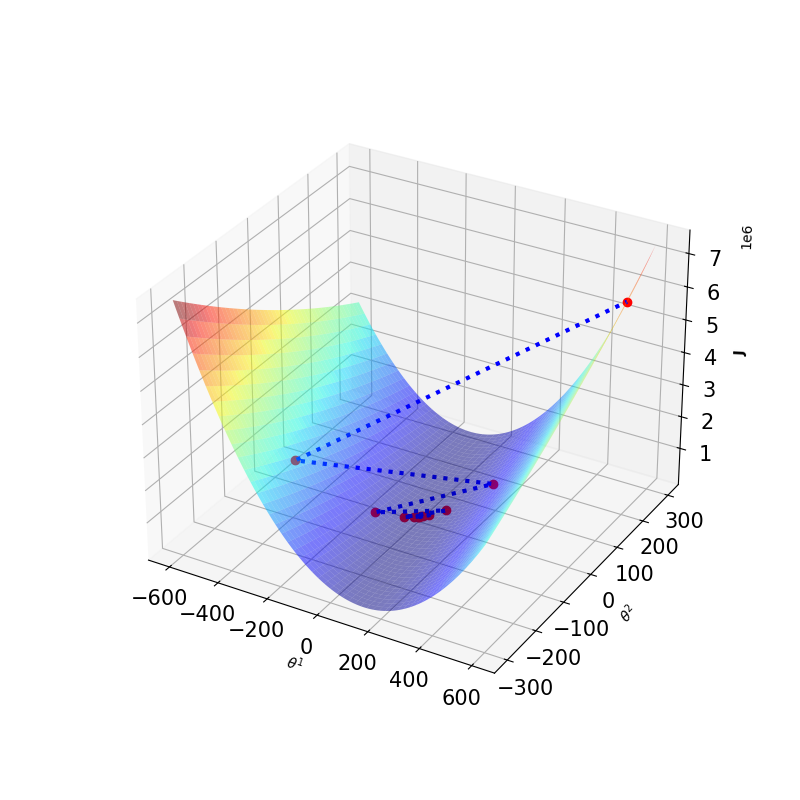

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
from IPython.display import clear_output


# Define the cost function
def CompJ(in_data, out_data, th1, th2):
    J = np.zeros(th1.shape)
    for ii in range(len(in_data)):
        J += (out_data[ii] - in_data[ii]*th1 - th2)**2
    return J

# Gradient descent function
def gradient_descent(in_data, out_data, l_r, n_iter):
    J1 = lambda t1, t2: -2 * np.sum((out_data - t1 * in_data - t2) * in_data)
    J2 = lambda t1, t2: -2 * np.sum((out_data - t1 * in_data - t2))
    
    t1 = np.zeros(n_iter)
    t2 = np.zeros(n_iter)
    t1[0] = 1
    t2[0] = 0
    
    for ii in range(1, n_iter):
        t1[ii] = t1[ii - 1] - l_r * J1(t1[ii - 1], t2[ii - 1])
        t2[ii] = t2[ii - 1] - l_r * J2(t1[ii - 1], t2[ii - 1])
    
    return t1, t2

# Modified plot_gradient_descent function to include dynamic plotting with pauses
def plot_gradient_descent(in_data, out_data, t1, t2, th1_range, th2_range, fig_number):
   
    th1, th2 = np.meshgrid(th1_range, th2_range)
   
    J = CompJ(in_data, out_data, th1, th2)

    # Initialize Jvec here
    Jvec = np.array([CompJ(in_data, out_data, t1[i], t2[i]) for i in range(len(t1))])

    scamap = plt.cm.ScalarMappable(cmap='jet')
    fcolors = scamap.to_rgba(J)
 
    for i in range(len(t1)):
        fig = plt.figure(fig_number, figsize=(8, 8))
        ax = fig.add_subplot(111, projection='3d')

        surf = ax.plot_surface(th1, th2, J, alpha=0.5, facecolors=fcolors, cmap='jet', edgecolor='none')
        ax.set_xlabel('${\\theta}^1$')
        ax.set_ylabel('${\\theta}^2$')
        ax.set_zlabel('$\\bf{J}$')
        ax.grid(True, which='both', linestyle='--', linewidth=2)
        ax.tick_params(labelsize=15)

        ax.plot(t1[:i+1], t2[:i+1], Jvec[:i+1], 'or', linewidth=3)
        ax.plot(t1[:i+1], t2[:i+1], Jvec[:i+1], ':b', linewidth=3)

        plt.draw()
        plt.pause(0.5)  # Allows the plot to be updated

        # Clear the output to make the plot appear dynamic
        clear_output(wait=True)
        plt.clf()  # Clear the figure to prevent overlay of plots

    plt.close()

# Example usage with in_data and out_data
# in_data = np.array([...])
# out_data = np.array([...])

# Run gradient descent and plot the results
"""
n_iter = 12
l_r = 0.05
t1, t2 = gradient_descent(in_data, out_data, l_r, n_iter)
th1_range = np.arange(1, 5.1, 0.1)
th2_range = np.arange(-1, 4.1, 0.1)
plot_gradient_descent(in_data, out_data, t1, t2, th1_range, th2_range, 6)

"""
n_iter = 12
l_r = 0.08
t1, t2 = gradient_descent(in_data, out_data, l_r, n_iter)
th1_range = np.arange(-600, 600, 1)
th2_range = np.arange(-300, 300, 1)
plot_gradient_descent(in_data, out_data, t1, t2, th1_range, th2_range, 6)


## Stochastic Gradient Descent 

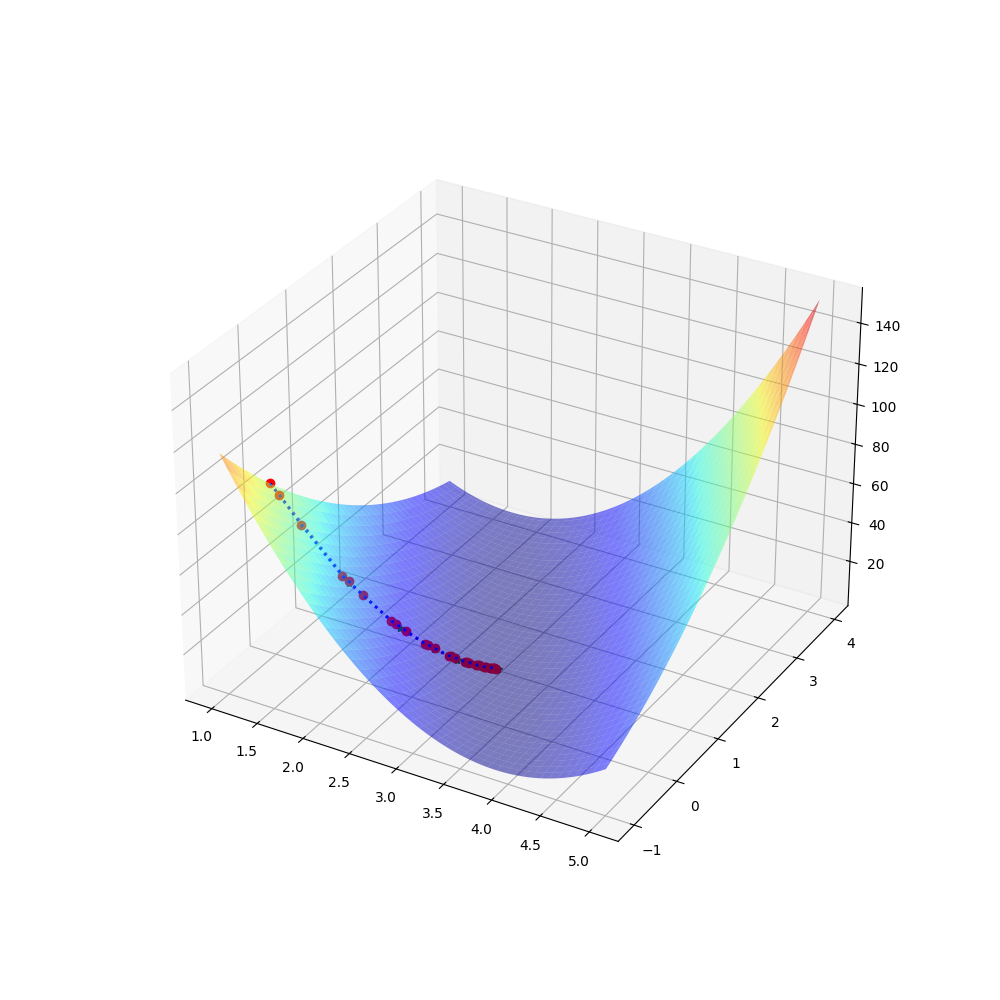

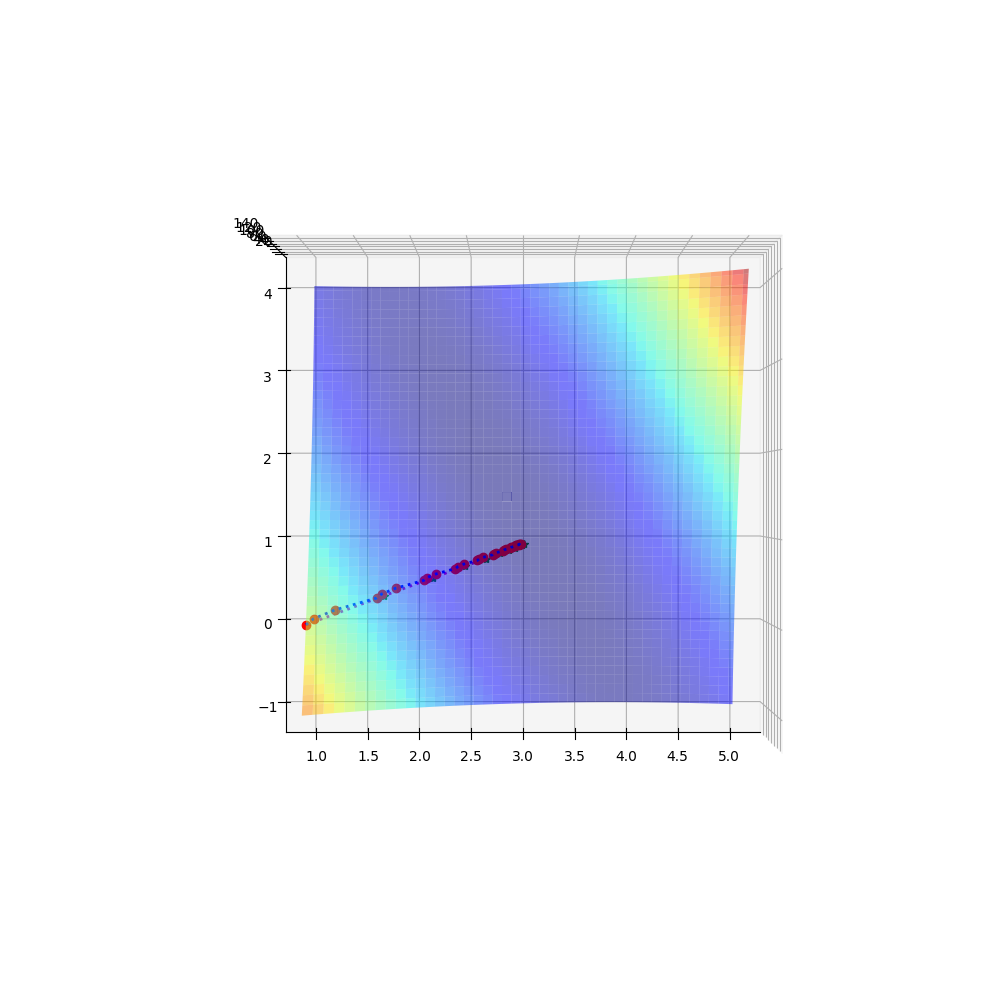

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Input data
# y = 3x + 1;
in_data = np.array([1, 2, 3])
out_data = np.array([4.2, 6.8, 10.1])

th1_range = np.arange(1, 5.01, 0.01)
th2_range = np.arange(-1, 4.01, 0.01)
th1, th2 = np.meshgrid(th1_range, th2_range)

def CompJ(in_data, out_data, th1, th2):
    J = np.zeros_like(th1)
    for i in range(len(in_data)):
        J += (out_data[i] - in_data[i] * th1 - th2) ** 2
    return J

J = CompJ(in_data, out_data, th1, th2)

# Stochastic Gradient Descent
n_iter = 12
l_r = 0.01

J1 = lambda t1, t2: -2 * np.sum((out_data - t1 * in_data - t2) * in_data)
J2 = lambda t1, t2: -2 * np.sum((out_data - t1 * in_data - t2))

t1 = np.zeros(n_iter)
t2 = np.zeros(n_iter)
t1[0] = 1
t2[0] = 0

for ii in range(1, n_iter):
    t1[ii] = t1[ii - 1] - l_r * J1(t1[ii - 1], t2[ii - 1])
    t2[ii] = t2[ii - 1] - l_r * J2(t1[ii - 1], t2[ii - 1])

# Stochastic Gradient Descent per data point
J1st = lambda t1, t2, out, inp: -2 * (out - t1 * inp - t2) * inp
J2st = lambda t1, t2, out, inp: -2 * (out - t1 * inp - t2)

t1st = np.zeros(n_iter * len(in_data))
t2st = np.zeros(n_iter * len(in_data))
t1st[0] = 1
t2st[0] = 0
count = 0

for ii in range(n_iter-1):
    for jj in range(len(in_data)):
        t1st[count + 1] = t1st[count] - l_r * J1st(t1st[count], t2st[count], out_data[jj], in_data[jj])
        t2st[count + 1] = t2st[count] - l_r * J2st(t1st[count], t2st[count], out_data[jj], in_data[jj])
        count += 1


# Surface plot
scamap = plt.cm.ScalarMappable(cmap='jet')
fcolors = scamap.to_rgba(J)

# Update plots with SGD path
Jvec = np.zeros(n_iter)
Jvecst = np.zeros(count)

count = 0
for ii in range(n_iter-1):
    clear_output(wait=True)
    fig1 = plt.figure(figsize=(10, 10))
    ax1 = fig1.add_subplot(111, projection='3d')

    fig2 = plt.figure(figsize=(10, 10))
    ax2 = fig2.add_subplot(111, projection='3d')
    ax2.view_init(elev=90, azim=-90, roll=0)

    s = ax1.plot_surface(th1, th2, J, alpha=0.5, facecolors=fcolors, cmap='jet', edgecolor='none')
    s = ax2.plot_surface(th1, th2, J, alpha=0.5, facecolors=fcolors, cmap='jet', edgecolor='none')

    Jvec[ii] = CompJ(in_data, out_data, t1[ii], t2[ii])
    ax1.plot(t1[:ii + 1], t2[:ii + 1], Jvec[:ii + 1], '*g', linewidth=3)
    ax1.plot(t1[:ii + 1], t2[:ii + 1], Jvec[:ii + 1], ':m', linewidth=2)
    
    ax2.plot(t1[:ii + 1], t2[:ii + 1], Jvec[:ii + 1], '*g', linewidth=3)
    ax2.plot(t1[:ii + 1], t2[:ii + 1], Jvec[:ii + 1], ':m', linewidth=2)
        
    for jj in range(len(in_data)):
        Jvecst[count] = CompJ(in_data, out_data, t1st[count], t2st[count])
        ax1.plot(t1st[:count + 1], t2st[:count + 1], Jvecst[:count + 1], 'or', linewidth=3)
        ax1.plot(t1st[:count + 1], t2st[:count + 1], Jvecst[:count + 1], ':b', linewidth=2)
        
        ax2.plot(t1st[:count + 1], t2st[:count + 1], Jvecst[:count + 1], 'or', linewidth=3)
        ax2.plot(t1st[:count + 1], t2st[:count + 1], Jvecst[:count + 1], ':b', linewidth=2)

        count += 1

        plt.draw()
        plt.pause(0.3)  # Allows the plot to be updated

        

plt.show()
